tensorflow, keras → we use to build and train deep learning model
MobileNetV2 → CNN model that we use for this problem beacause our dataset is low for that we will use mobilenetv2

EarlyStopping + ModelCheckpoint for  Prevent overfitting and save best model


In [ ]:
# first we import all the necessary libraries

!pip install matplotlib.pyplot seaborn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

print("TensorFlow Version:", tf.__version__)


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:

# STEP 2: Load Dataset



train_dir = "e:/mlproject/data/train"
val_dir = "e:/mlproject/data/valid"
img_size = (224, 224)
batch_size = 8

train_ds = image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)



val_ds = image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

#prefetch(auto) to optimize dataset performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)








Found 38 files belonging to 2 classes.
Found 24 files belonging to 2 classes.


In [ ]:
#STEP 3: Data Augmentation
# Due to Small dataset there is  risk of overfitting for that we use data augmentation
# this helps to increase the size of the training dataset by creating modified versions of images in the dataset.



data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.1),
])


CNN MODEL IMPLEMENTATION   MOBILENETV2 bcz this is good for small datasets and it Pretrained on ImageNet , so it already knows “general” features

In [ ]:

#BUILDING THE MODEL

base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False,
                         weights="imagenet")






base_model.trainable = False  # freeze Freeze weights, avoid overfitting on small dataset
x = layers.Conv2D(3, (3, 3), padding="same")(inputs)
x = data_augmentation(base_model.output)
x = GlobalAveragePooling2D()(x) # Convert features to 1D vector
x = Dropout(0.3)(x) # Prevents overfitting
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "functional_87"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_64      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_64[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2936 - loss: 1.1349

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.4474 - loss: 0.9752 - val_accuracy: 0.7500 - val_loss: 0.6236
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6879 - loss: 0.6449 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.7105 - loss: 0.5703 - val_accuracy: 0.7917 - val_loss: 0.4456
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7643 - loss: 0.4421

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.8421 - loss: 0.3576 - val_accuracy: 0.7917 - val_loss: 0.3796
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7840 - loss: 0.4720

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.8158 - loss: 0.3943 - val_accuracy: 0.7917 - val_loss: 0.3162
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8602 - loss: 0.2631 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.8947 - loss: 0.2655 - val_accuracy: 0.8333 - val_loss: 0.2448
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8154 - loss: 0.2811 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.8684 - loss: 0.2827 - val_accuracy: 0.9167 - val_loss: 0.1762
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9885 - loss: 0.1255

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.9737 - loss: 0.1453 - val_accuracy: 1.0000 - val_loss: 0.1388
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.1081

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 1.0000 - loss: 0.1332 - val_accuracy: 1.0000 - val_loss: 0.1169
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9677 - loss: 0.1213

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9737 - loss: 0.1407 - val_accuracy: 1.0000 - val_loss: 0.1011
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9802 - loss: 0.1427

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.9737 - loss: 0.1490 - val_accuracy: 1.0000 - val_loss: 0.0871
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9677 - loss: 0.0927

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.9737 - loss: 0.0869 - val_accuracy: 1.0000 - val_loss: 0.0750
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.1140

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 1.0000 - loss: 0.1041 - val_accuracy: 1.0000 - val_loss: 0.0636
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.0952

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 1.0000 - loss: 0.0736 - val_accuracy: 1.0000 - val_loss: 0.0563
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.0416

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 1.0000 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0509
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9947 - loss: 0.0476

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.9737 - loss: 0.0755 - val_accuracy: 1.0000 - val_loss: 0.0467
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9947 - loss: 0.0436 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9737 - loss: 0.0596 - val_accuracy: 1.0000 - val_loss: 0.0433
Epoch 17/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0546

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 1.0000 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0402
Epoch 18/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.0517

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 1.0000 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 0.0373
Epoch 19/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.0700

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 1.0000 - loss: 0.0550 - val_accuracy: 1.0000 - val_loss: 0.0343
Epoch 20/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0469

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 1.0000 - loss: 0.0504 - val_accuracy: 1.0000 - val_loss: 0.0320


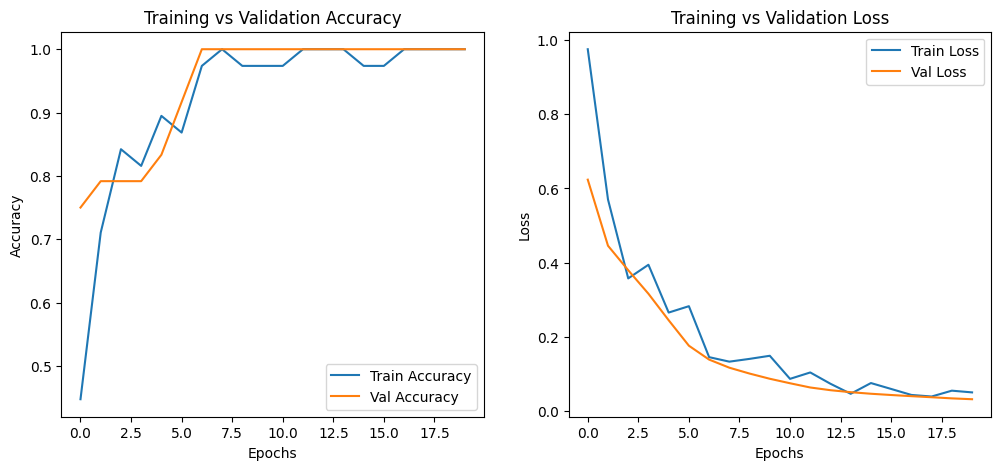

In [ ]:
# NOW :- Training

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint("best_defect_model.h5", save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

# Plot Training & Validation Accuracy/Loss

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()





In [ ]:

# STEP 6: Fine-Tuning (Unfreeze top layers of base model)

base_model.trainable = True
for layer in base_model.layers[:-30]:  # freeze all but last 30 layers
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(5e-6),
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 558ms/step - accuracy: 0.9474 - loss: 0.2868 - val_accuracy: 1.0000 - val_loss: 0.0320
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 1.0000 - loss: 0.1977 - val_accuracy: 1.0000 - val_loss: 0.0322
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.9737 - loss: 0.2123 - val_accuracy: 1.0000 - val_loss: 0.0324
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.9737 - loss: 0.2266 - val_accuracy: 1.0000 - val_loss: 0.0327
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.8947 - loss: 0.2588 - val_accuracy: 1.0000 - val_loss: 0.0331


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
Optimal Threshold = 0.033

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.82      0.95      0.88        19

    accuracy                           0.79        24
   macro avg       0.66      0.57      0.58        24
weighted avg       0.75      0.79      0.75        24

ROC-AUC: 0.5052631578947369


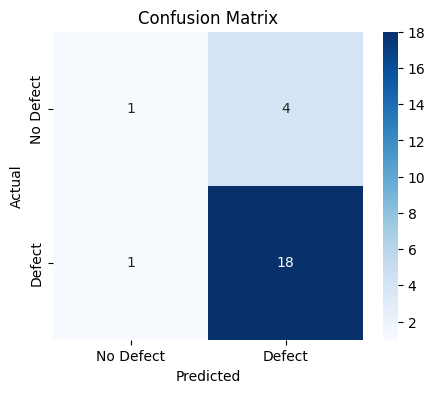

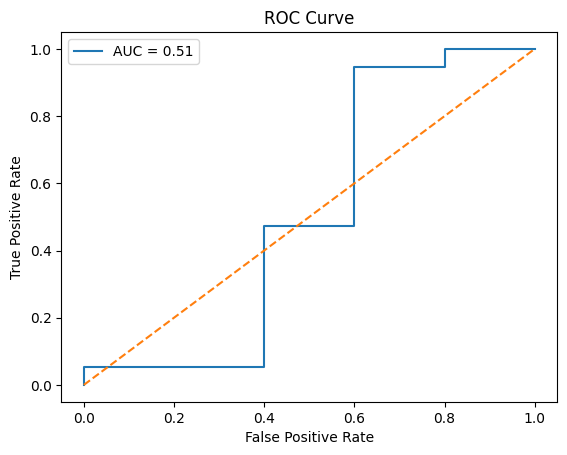

In [ ]:
# STEP 7: Evaluation

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import seaborn as sns

# --- Predictions ---
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_prob = model.predict(val_ds).ravel()

# --- Find Best Threshold using Precision-Recall Tradeoff ---
prec, rec, thresh = precision_recall_curve(y_true, y_pred_prob)
f1_scores = 2 * prec * rec / (prec + rec + 1e-7)  # avoid div by 0
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Optimal Threshold = {best_thresh:.3f}")

# --- Apply Best Threshold ---
y_pred = (y_pred_prob > best_thresh).astype(int)

# --- Classification Report ---
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# --- ROC-AUC ---
print("ROC-AUC:", roc_auc_score(y_true, y_pred_prob))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Defect','Defect'],
            yticklabels=['No Defect','Defect'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_pred_prob):.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()
